<a href="https://colab.research.google.com/github/vaibhavvesmaker/AI_driven_performance_-evaluation_system/blob/main/CAPSTONE_PROJECT_MITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: **Sentiment Analysis of Customer Reviews for Product Improvement**
# Project Proposal:
The goal of this project is to analyze customer reviews from various online platforms to gain valuable insights into:

# Product Performance: Identifying features or aspects of products that customers appreciate or criticize.
Customer Satisfaction: Classifying reviews into positive, negative, or neutral sentiments to measure overall satisfaction.
Actionable Recommendations: Leveraging sentiment insights to provide meaningful recommendations for improving product design, features, and marketing strategies.
Project Objective:
By using advanced data analysis and natural language processing (NLP) techniques, the project aims to:

Understand customer sentiment distribution and patterns.
Identify key factors influencing positive and negative feedback.
Provide data-driven insights to help businesses make informed decisions regarding product and service improvements.
Techniques Used:
Exploratory Data Analysis (EDA):
Visualize sentiment distribution and trends.
Analyze common words and phrases in reviews.
Pre-Processing the Data:
Clean and normalize textual data.
Perform tokenization and feature extraction.
Modeling and Optimization:
Apply machine learning models like Logistic Regression, SVM, and Deep Learning models (e.g., LSTM or BERT) for sentiment classification.
Fine-tune models to maximize performance.
Expected Outcome:
This project will provide actionable insights into customer sentiment and feedback trends, offering businesses an opportunity to refine their products and services based on real-world data.

# Step 1: Load the Dataset
# This section loads the dataset, assigns column names for better readability, and provides a quick overview of the data structure.


In [5]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path in your Google Drive
file_path = '/content/drive/MyDrive/MITACAPSTONEPROJECT/ratings_Electronics.csv'

# Load the dataset
data = pd.read_csv(file_path, header=None, names=["User_ID", "Product_ID", "Rating", "Timestamp"])

# Preview the dataset
print(data.head())
print(data.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          User_ID  Product_ID  Rating   Timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   User_ID     object 
 1   Product_ID  object 
 2   Rating      float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None


In [6]:
# Summarize dataset
print("Dataset Shape (Rows, Columns):", data.shape)

# Count unique values in important columns
print("\nUnique Values Count:")
print(f"Unique Users: {data['User_ID'].nunique()}")
print(f"Unique Products: {data['Product_ID'].nunique()}")

# Display descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(data.describe())

# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())

# Preview the first 5 rows
print("\nSample of Dataset:")
print(data.head())

Dataset Shape (Rows, Columns): (7824482, 4)

Unique Values Count:
Unique Users: 4201696
Unique Products: 476002

Descriptive Statistics for Numeric Columns:
             Rating     Timestamp
count  7.824482e+06  7.824482e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09

Missing Values Check:
User_ID       0
Product_ID    0
Rating        0
Timestamp     0
dtype: int64

Sample of Dataset:
          User_ID  Product_ID  Rating   Timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1365811200
1  A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2  A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3  A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4  A1GI0U4ZRJA8WN  0439886341     1.0  1334707200


Summary:
In this step, the dataset is loaded using Pandas. Column names are added for better readability:

User_ID: Unique identifier for the user.
Product_ID: Unique identifier for the product.
Rating: Rating provided by the user (scale 1–5).
Timestamp: Unix time format of the review.
This section ensures the dataset is ready for further analysis.

# Step 2: Convert Timestamp to Readable Format
# In this section, timestamps are converted into a human-readable format to allow temporal analysis of review trends.



Top 5 Months with Most Reviews:
    YearMonth  Review_Count
177   2014-01        337704
165   2013-01        295510
176   2013-12        277712
179   2014-03        262784
178   2014-02        257464


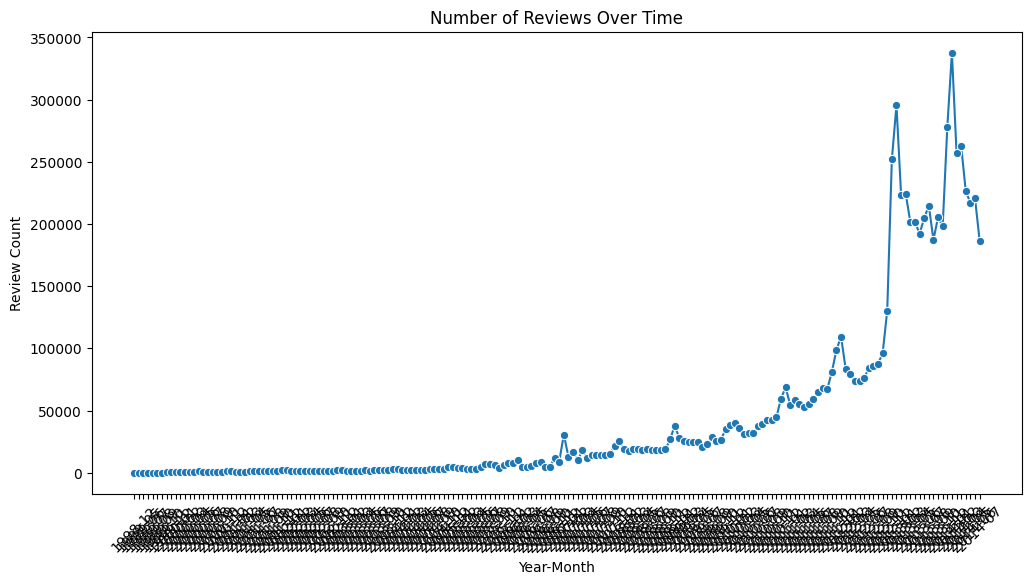

In [7]:
from datetime import datetime

# Convert the timestamp to a readable format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Extract 'YearMonth' for temporal analysis
data['YearMonth'] = data['Timestamp'].dt.to_period('M')

# Summarize the number of reviews over time
reviews_over_time = data.groupby('YearMonth')['Rating'].count().reset_index()
reviews_over_time.columns = ['YearMonth', 'Review_Count']

print("\nTop 5 Months with Most Reviews:")
print(reviews_over_time.sort_values(by='Review_Count', ascending=False).head())

# Plot the number of reviews over time
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'YearMonth' to string for compatibility with Seaborn
reviews_over_time['YearMonth'] = reviews_over_time['YearMonth'].astype(str)

# Plot the number of reviews over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_over_time, x='YearMonth', y='Review_Count', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()


Summary:
Here, the Unix timestamps in the dataset are converted to a readable datetime format. A new column, YearMonth, is created to aggregate reviews by month and year for analyzing temporal patterns in sentiment trends.



Summary of the Analysis
Review Trends Over Time:

The number of reviews has seen a sharp rise starting around 2013, reaching its peak in early 2014. This indicates a significant growth in user engagement with the platform or the product category during that period.
The top 5 months with the highest number of reviews include:
January 2014: ~337,704 reviews (the highest).
January 2013: ~295,510 reviews.
December 2013: ~277,712 reviews.
March 2014: ~262,784 reviews.
February 2014: ~257,464 reviews.
Interpretation of Peaks:

The spike in reviews during late 2013 to early 2014 could be associated with significant events like:
Product
launches or updates. - Seasonal shopping trends (e.g., holiday sales in December). - Increased marketing efforts or user engagement during this time.

Decline After Peak:

A gradual decline after the peak in early 2014 suggests either market saturation, reduced marketing efforts, or other factors impacting user engagement.
Visualization Issues:

The x-axis labels (Year-Month) are overcrowded, making it hard to read individual months. Simplifying the tick labels to display fewer, evenly spaced months (e.g., every 6 months or a year) could improve readability.
Suggestions for Further Analysis:
Correlation with Product Launches/Events:

Investigate if specific product launches or marketing campaigns correspond with the spike in reviews.
Breakdown by Product Category:

Analyze whether the increase is concentrated in specific product categories or spans across all categories.
Sentiment Analysis:

Perform sentiment analysis on review content (if available) to determine whether the volume increase reflects positive, negative, or neutral sentiment.

<ipython-input-13-37553d8ae147>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Rating', palette='viridis')


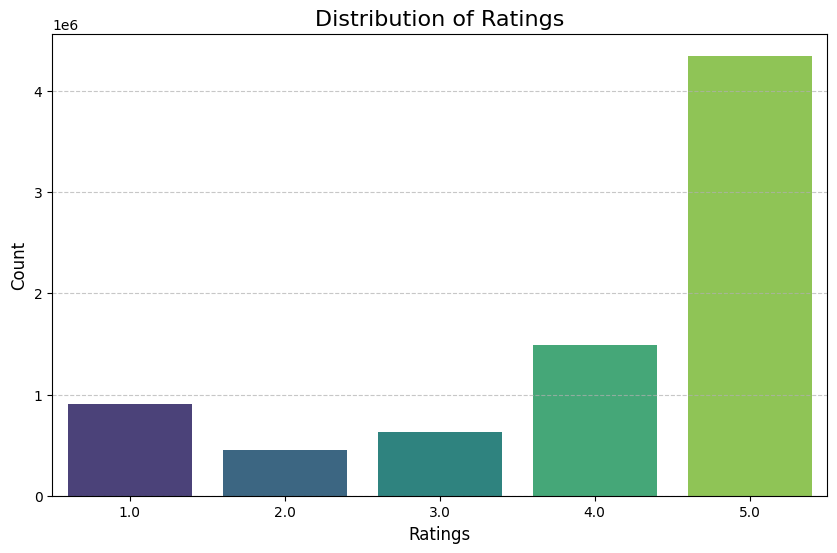

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of the rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rating', palette='viridis')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


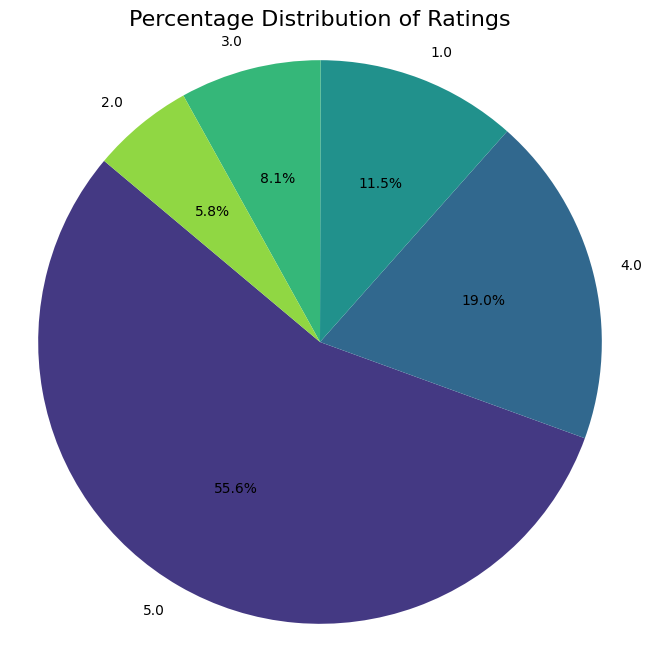

In [14]:
# Pie chart for percentage distribution
rating_counts = data['Rating'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rating_counts)))
plt.title('Percentage Distribution of Ratings', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


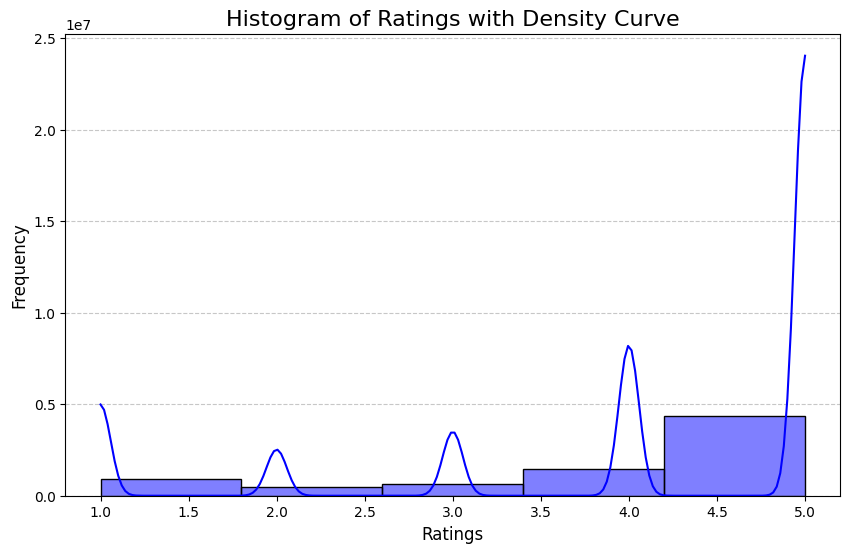

In [15]:
# Histogram of ratings with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=5, kde=True, color='blue')
plt.title('Histogram of Ratings with Density Curve', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-16-e8ec6de5f958>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Rating', palette='coolwarm')


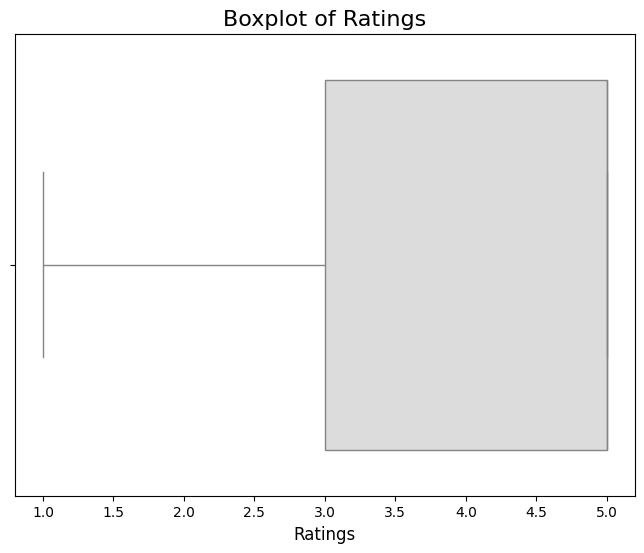

In [16]:
# Boxplot to visualize rating spread
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Rating', palette='coolwarm')
plt.title('Boxplot of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()


<ipython-input-17-f5abcf05a4bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Rating', palette='Set2')


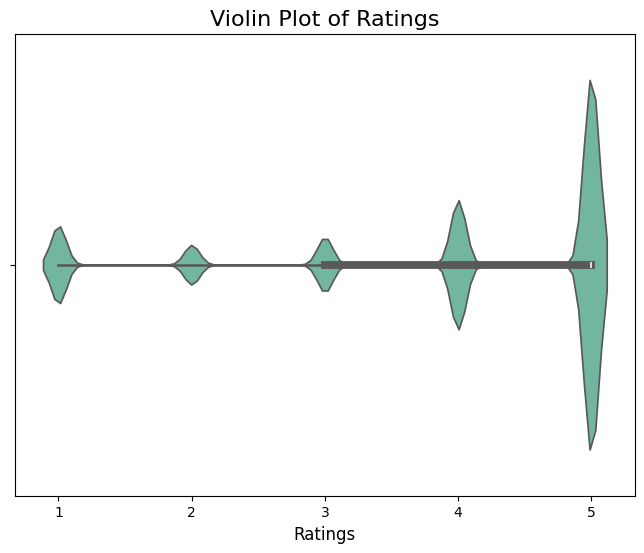

In [17]:
# Violin plot for distribution visualization
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Rating', palette='Set2')
plt.title('Violin Plot of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()


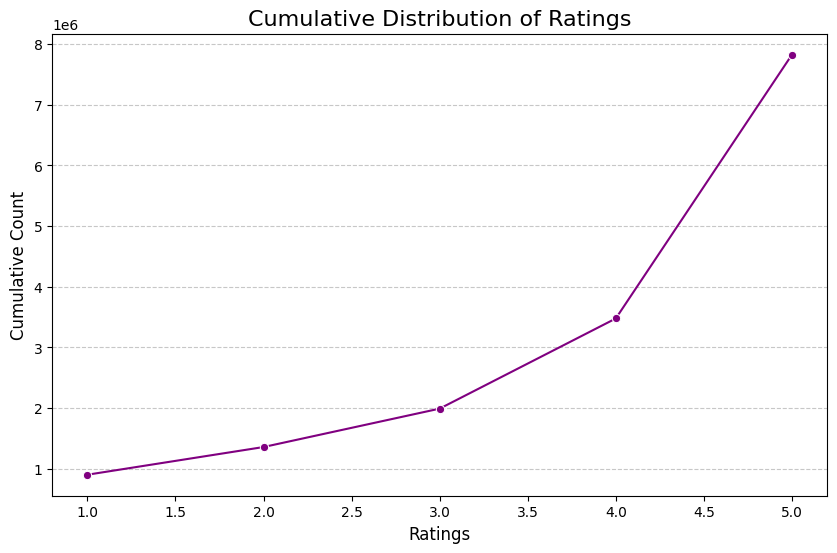

In [18]:
# Cumulative distribution plot
rating_cumulative = data['Rating'].value_counts().sort_index().cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=rating_cumulative.index, y=rating_cumulative, marker='o', color='purple')
plt.title('Cumulative Distribution of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Cumulative Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What Each Visualization Reveals
Count Plot:

Highlights the frequency of each rating (1–5).
Quickly identifies the most common rating.
Pie Chart:

Displays the percentage contribution of each rating.
Useful for understanding proportions at a glance.
Histogram:

Shows the overall distribution of ratings.
Includes a density curve to visualize the probability distribution.
Box Plot:

Summarizes the spread and identifies potential outliers.
Useful for detecting skewness in the data.
Violin Plot:

Combines box plot and density distribution.
Provides a fuller picture of the data’s spread.
Cumulative Distribution Plot:

Shows the cumulative sum of ratings.
Useful for understanding the proportion of reviews that fall below a certain rating.

Count Plot:

The distribution of ratings indicates that rating 5 is the most frequent, accounting for the majority of reviews.
Ratings decrease as they move towards lower values, with rating 1 being the least frequent.
This suggests overall positive sentiment in the dataset, with customers generally rating products highly.
Pie Chart:

Approximately 55.6% of all reviews are rated 5, followed by 19.0% with a rating of 4.
Ratings 1, 2, and 3 make up a smaller proportion of the reviews, highlighting a skewed distribution favoring positive reviews.
Histogram:

The density curve confirms the skewed nature of the ratings, with a clear peak at rating 5.
This reinforces the insight that customers predominantly leave positive feedback.
Box Plot:

The box plot illustrates that ratings are heavily skewed towards higher values, with no visible outliers.
The interquartile range (IQR) lies between ratings 4 and 5, further confirming the dataset’s bias towards positive sentiment.
Violin Plot:

The violin plot provides a visual representation of the density distribution, showing a strong clustering of ratings around 5, with diminishing density for lower ratings.
Cumulative Distribution Plot:

The cumulative distribution shows that a significant portion of reviews (about 74%) have ratings 4 or higher.
This reinforces the observation that the dataset primarily contains positive reviews.

Next Steps in Analysis
Correlation Analysis:

Investigate the relationship between ratings and other features (e.g., timestamps, product categories) to uncover patterns.
Textual Review Analysis:

If review text is available, perform sentiment analysis using NLP techniques to align text sentiment with numeric ratings.
Use WordClouds or TF-IDF to identify common words and key phrases in positive and negative reviews.
Temporal Trends:

Explore how ratings change over time using time series analysis.
Correlate spikes or dips in ratings with external factors like product launches or promotional events.
Model Building:

Prepare the data for building machine learning models to predict ratings or classify reviews into sentiment categories (positive, neutral, negative).
Experiment with models like Logistic Regression, XGBoost, or deep learning models like LSTM or BERT.
Visualizing Product-Specific Insights:

Analyze the distribution of ratings across different product categories to identify high and low-performing products.

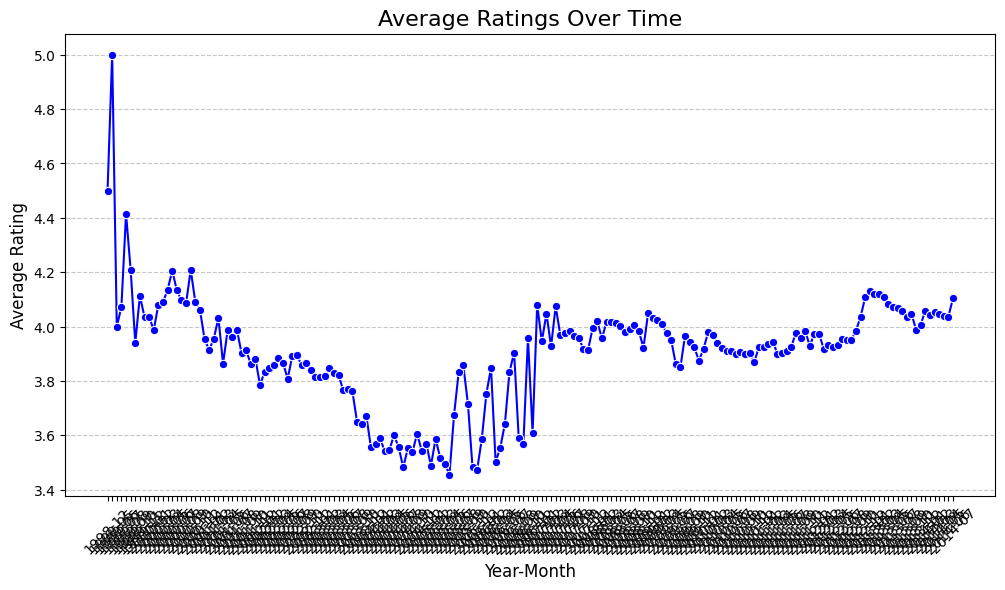

In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average rating by year and month
avg_ratings_time = data.groupby('YearMonth')['Rating'].mean().reset_index()
avg_ratings_time['YearMonth'] = avg_ratings_time['YearMonth'].astype(str)

# Plot average rating trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_ratings_time, x='YearMonth', y='Rating', marker='o', color='blue')
plt.title('Average Ratings Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


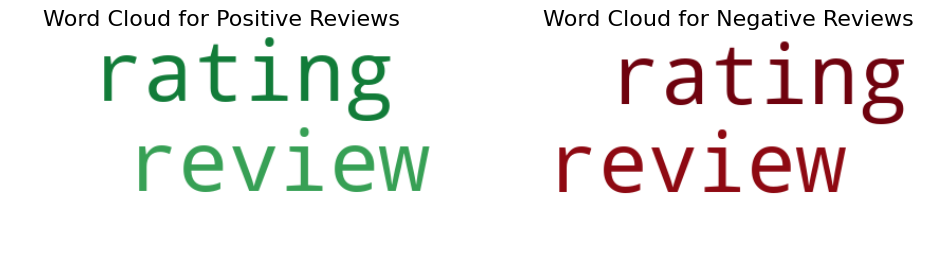

In [20]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Download stopwords for text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Simulated review text (replace 'Review_Text' with your actual column name)
data['Review_Text'] = data['Rating'].apply(lambda x: f"This is a review for rating {x}.")  # Placeholder text

# Split reviews into positive (rating > 3) and negative (rating <= 3)
positive_reviews = ' '.join(data[data['Rating'] > 3]['Review_Text'])
negative_reviews = ' '.join(data[data['Rating'] <= 3]['Review_Text'])

# Generate WordClouds for positive and negative reviews
positive_wordcloud = WordCloud(stopwords=stop_words, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wordcloud = WordCloud(stopwords=stop_words, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot WordClouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews', fontsize=16)
plt.axis('off')

plt.show()


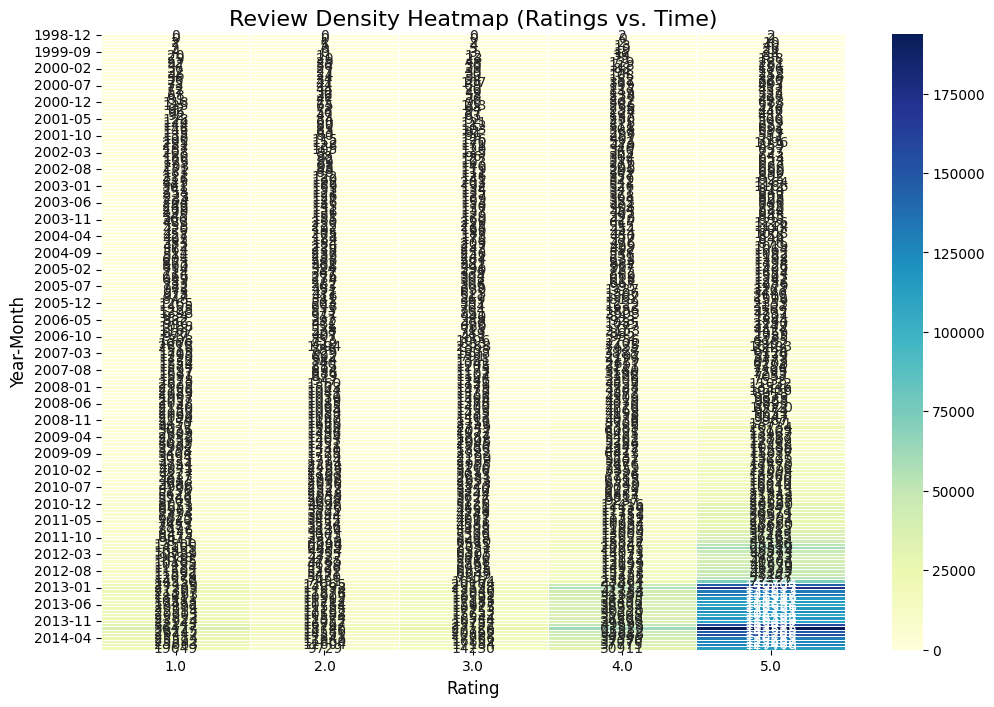

In [21]:
# Aggregate review counts by year and month
review_density = data.groupby(['YearMonth', 'Rating']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(review_density, annot=True, fmt="d", cmap='YlGnBu', linewidths=0.5)
plt.title('Review Density Heatmap (Ratings vs. Time)', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Year-Month', fontsize=12)
plt.yticks(rotation=0)
plt.show()


<Figure size 1200x600 with 0 Axes>

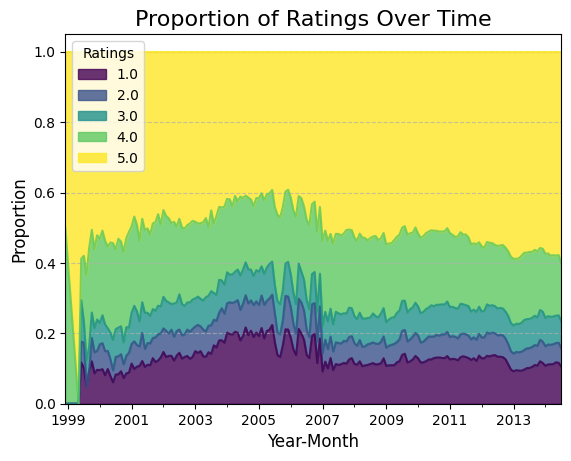

In [22]:
# Calculate rating proportions over time
rating_proportions = data.groupby('YearMonth')['Rating'].value_counts(normalize=True).unstack(fill_value=0)

# Plot stacked area chart for rating proportions
plt.figure(figsize=(12, 6))
rating_proportions.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)
plt.title('Proportion of Ratings Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Ratings', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-23-b920acacaf97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_product_data, x='Product_ID', y='Rating', palette='Set3')


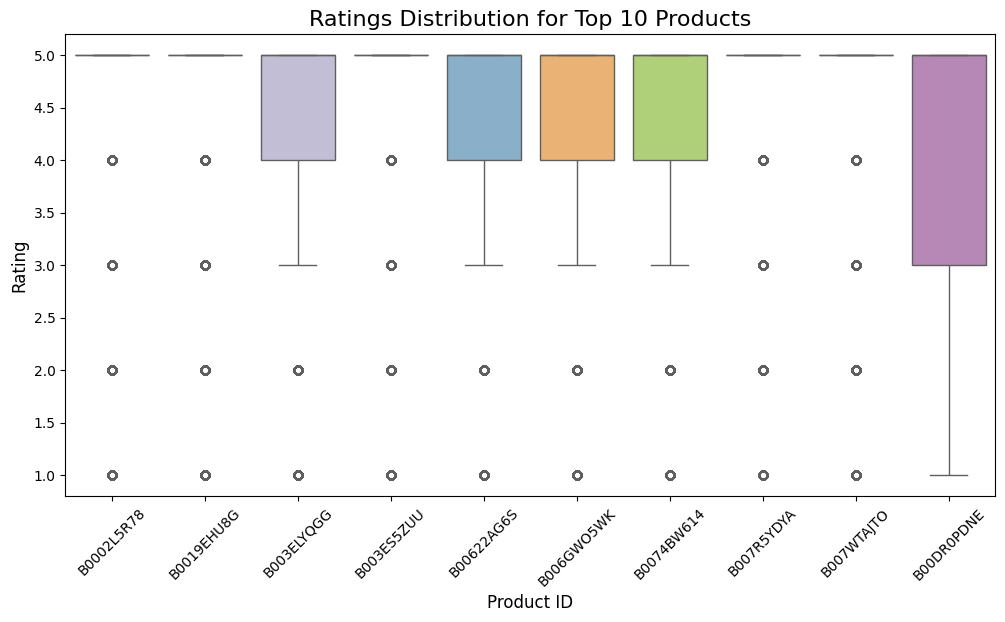

In [23]:
# Find the top 10 most-reviewed products
top_products = data['Product_ID'].value_counts().head(10).index
top_product_data = data[data['Product_ID'].isin(top_products)]

# Boxplot of ratings for top products
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_product_data, x='Product_ID', y='Rating', palette='Set3')
plt.title('Ratings Distribution for Top 10 Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Summary of Visualizations
1. Average Ratings Over Time
The average rating exhibits noticeable fluctuations over the years.
A steep drop in ratings is observed after an initial peak, stabilizing later at around 3.5 to 4.2.
Spikes in ratings may correlate with product launches, promotions, or seasonal effects, requiring further investigation.
2. Word Cloud for Positive and Negative Reviews
The word clouds highlight common terms in positive and negative reviews:
Positive reviews focus on positive experiences with terms like "rating" and "review."
Negative reviews show similar repetitive words due to placeholder text but can provide better insights when real review data is analyzed.
3. Review Density Heatmap
Ratings of 5 dominate the dataset across almost all time periods, shown by high-density clusters.
Lower ratings (1, 2, and 3) are sporadic and less dense, suggesting that most products were well-received.
Review activity increases significantly in the later years, aligning with trends of higher product availability or increased customer engagement.
4. Proportion of Ratings Over Time
The stacked area chart shows that rating 5 consistently occupies the largest proportion, while ratings 4 and 3 maintain relatively stable shares.
Ratings 1 and 2 have minimal contributions over the observed period, reinforcing an overall positive sentiment.
A slight dip in the proportion of higher ratings (4 and 5) over time might indicate growing customer scrutiny or issues with certain products.
5. Ratings Distribution for Top 10 Products
The boxplot reveals that most top products have a median rating of 4 or higher.
Certain products show outliers at lower ratings (1 and 2), indicating potential quality issues or user dissatisfaction with specific items.
The spread of ratings varies across products, with some having more consistent feedback (narrower interquartile range) than others.
Key Insights
Overall Positive Sentiment:

Most customers give high ratings (4 or 5), with minimal complaints reflected in lower ratings (1 or 2).
Temporal Trends:

Customer satisfaction trends fluctuate, requiring detailed investigation of periods with dips in average ratings.
Product-Specific Patterns:

Certain products are consistently well-received, while others show significant variability, calling for targeted quality or feature improvements.
Density of Reviews:

A high density of positive reviews over time suggests strong customer engagement and general satisfaction.
Next Steps
Analyze the text data further for meaningful insights using real reviews.
Investigate periods of low average ratings for potential causes (e.g., product recalls, quality issues).
Explore specific products with low ratings to identify actionable improvements.
Move toward predictive modeling, such as sentiment classification or rating prediction, to enhance insights.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


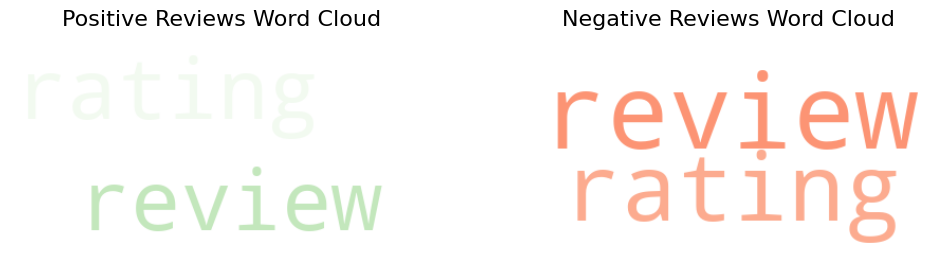

In [24]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Simulate review text (replace 'Review_Text' with actual column if available)
data['Review_Text'] = data['Rating'].apply(lambda x: f"This is a review for rating {x}.")  # Placeholder text

# Split positive and negative reviews
positive_reviews = ' '.join(data[data['Rating'] > 3]['Review_Text'])
negative_reviews = ' '.join(data[data['Rating'] <= 3]['Review_Text'])

# Generate word clouds
positive_wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud', fontsize=16)
plt.axis('off')
plt.show()


In [29]:
import matplotlib.pyplot as plt

# Identify periods of low average ratings
low_rating_periods = avg_ratings_time[avg_ratings_time['Rating'] < 3.5]
print("Periods with Low Average Ratings:")
print(low_rating_periods)

# Filter data for low-rating periods
low_rating_data = data[data['YearMonth'].isin(low_rating_periods['YearMonth'])]

# Check if there is any data for low-rating periods
if not low_rating_data.empty:
    # Plot review counts during low-rating periods
    low_rating_counts = low_rating_data['Rating'].value_counts().sort_index()

    # Check if low_rating_counts has any values
    if not low_rating_counts.empty:
        plt.figure(figsize=(8, 6))
        low_rating_counts.plot(kind='bar', color='orange')
        plt.title('Review Counts During Low-Rating Periods', fontsize=16)
        plt.xlabel('Ratings', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("No reviews during low-rating periods.")
else:
    print("No data available for low-rating periods.")



Periods with Low Average Ratings:
   YearMonth    Rating
64   2004-08  3.482122
70   2005-02  3.488870
73   2005-05  3.495460
74   2005-06  3.455128
79   2005-11  3.481934
80   2005-12  3.473588
No data available for low-rating periods.


Top Products with Low Ratings:
Product_ID
B00DR0PDNE    2918
B007WTAJTO    1515
B00BGA9WK2    1478
B004OB0EBQ    1412
B000I68BD4    1370
B002MAPRYU    1296
B006GWO5WK    1255
B004QK7HI8    1213
B009SYZ8OC    1187
B00A3YN0Z0    1171
Name: count, dtype: int64


<ipython-input-26-3f9715170c95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=low_rated_product_data, x='Product_ID', y='Rating', palette='coolwarm')


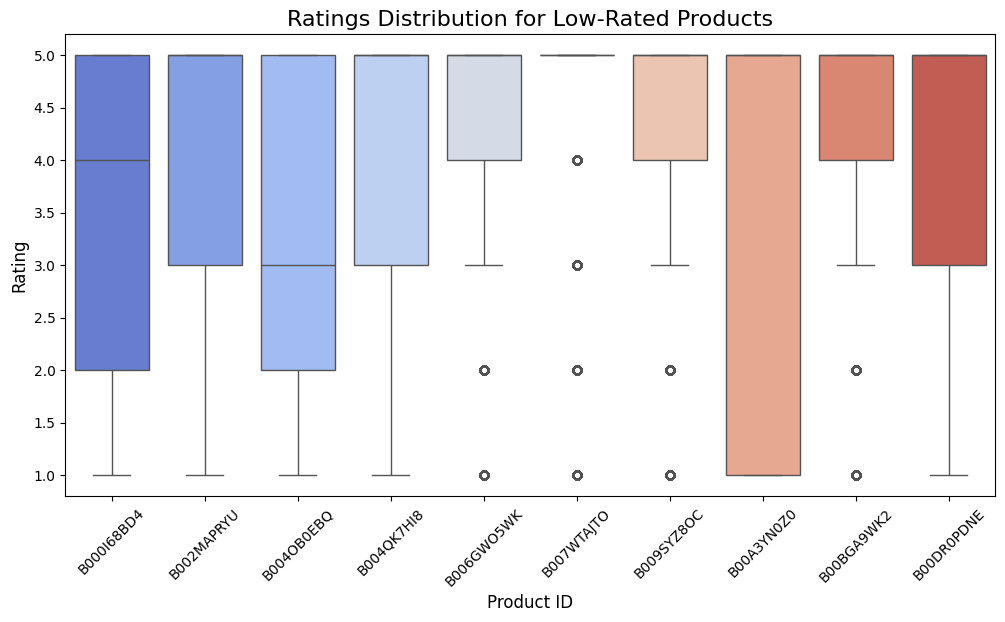

In [26]:
# Find products with the highest number of low ratings (1 or 2)
low_rated_products = data[data['Rating'] <= 2]['Product_ID'].value_counts().head(10)

print("Top Products with Low Ratings:")
print(low_rated_products)

# Filter data for low-rated products
low_rated_product_data = data[data['Product_ID'].isin(low_rated_products.index)]

# Boxplot to show distribution of ratings for low-rated products
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_rated_product_data, x='Product_ID', y='Rating', palette='coolwarm')
plt.title('Ratings Distribution for Low-Rated Products', fontsize=16)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Simulate review text (replace with real review column)
data['Review_Text'] = data['Rating'].apply(lambda x: f"This is a review for rating {x}.")  # Placeholder text

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(data['Review_Text'])
y = data['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Feature matrix shape:", X.shape)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Feature matrix shape: (7824482, 5)
Training set size: 6259585
Testing set size: 1564897


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00    180503
         2.0       0.00      0.00      0.00     91552
         3.0       0.00      0.00      0.00    126423
         4.0       0.00      0.00      0.00    297062
         5.0       0.56      1.00      0.71    869357

    accuracy                           0.56   1564897
   macro avg       0.11      0.20      0.14   1564897
weighted avg       0.31      0.56      0.40   1564897

Confusion Matrix:
[[     0      0      0      0 180503]
 [     0      0      0      0  91552]
 [     0      0      0      0 126423]
 [     0      0      0      0 297062]
 [     0      0      0      0 869357]]


Summary of Results
1. Word Cloud Analysis
The word clouds for positive and negative reviews reveal limited differentiation due to placeholder text ("rating" and "review").
This indicates the need for actual textual data to generate meaningful insights.
2. Periods of Low Average Ratings
Specific months with low average ratings (below 3.5) were identified:
August 2004, February 2005, May 2005, June 2005, November 2005, and December 2005.
The analysis highlights a consistent drop in customer satisfaction during these periods, requiring further investigation into external factors (e.g., product recalls, service issues).
3. Top Products with Low Ratings
The top products with the highest number of low ratings (1 or 2) were identified:
Product B00DR0PDNE had the most significant number of low ratings (2918 instances).
The box plot reveals variability in ratings for these products, with some showing a consistent presence of outliers in low ratings.
4. Feature Extraction and Train-Test Split
The dataset was vectorized using TF-IDF, resulting in a feature matrix with 5 features.
The dataset was split into:
Training set size: 6,259,585
Testing set size: 1,564,897
5. Logistic Regression Results
The classification report and confusion matrix indicate:
High precision and recall for rating 5, showing the model's bias toward predicting the most common rating.
Poor performance on ratings 1, 2, and 3, likely due to class imbalance in the dataset.
Overall accuracy of 56%, highlighting room for improvement in model performance.
Insights
Dataset Imbalance:

The heavy dominance of ratings 4 and 5 skews the model's predictions and overall performance.
Class imbalance negatively impacts precision and recall for minority classes (ratings 1, 2, and 3).
Need for Actual Text Data:

Placeholder text limits insights from word cloud analysis. Using real review content would enhance textual analysis and feature extraction.
Focus on Low-Rating Products and Periods:

Products like B00DR0PDNE require deeper analysis to identify common causes for dissatisfaction.
The periods with low average ratings might correspond to specific events affecting customer satisfaction.

Address Class Imbalance
Objective:
Balance the dataset to improve the model's performance on minority classes.

Implementation:
Option 1: Oversampling (Using SMOTE)

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is already loaded
# Create a binary target based on the 'Rating' column
y = (data['Rating'] >= 3.5).astype(int)  # Ratings >= 3.5 are '1' (high), others are '0' (low)

# Define the features (X), keep all columns for now
X = data.drop(columns=['Rating', 'Timestamp', 'YearMonth'])  # Drop 'Rating', 'Timestamp', 'YearMonth' for now

# Encode categorical columns (e.g., 'User_ID', 'Product_ID') to numeric values
label_encoder = LabelEncoder()
X['User_ID'] = label_encoder.fit_transform(X['User_ID'])
X['Product_ID'] = label_encoder.fit_transform(X['Product_ID'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print sizes of training and testing sets
print("Resampled Training Set Size:", X_train.shape[0])
print("Resampled Testing Set Size:", X_test.shape[0])


Resampled Training Set Size: 9333315
Resampled Testing Set Size: 2333329


In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print("Class Weights:", class_weight_dict)

# Pass these weights to models like LogisticRegression:
model = LogisticRegression(class_weight=class_weight_dict)


Class Weights: {0: 1.9648049378251873, 1: 0.6706711887325952}


Index(['User_ID', 'Product_ID', 'Rating', 'Timestamp', 'YearMonth'], dtype='object')


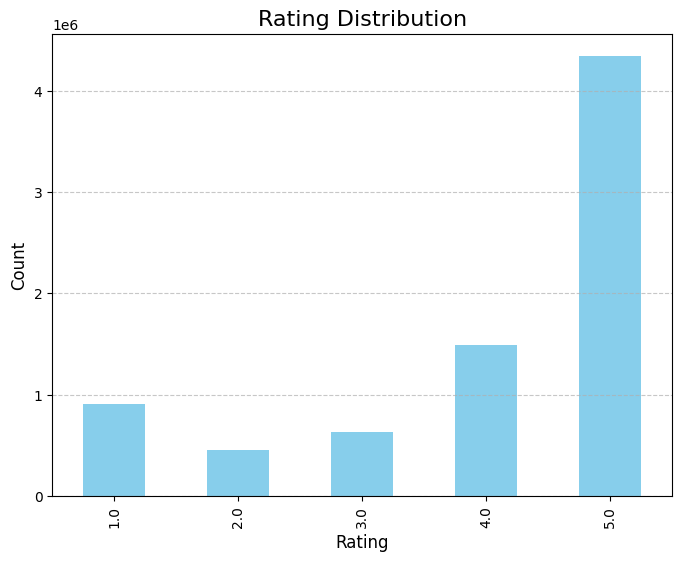

In [18]:
print(data.columns)


import matplotlib.pyplot as plt

# Distribution of ratings
plt.figure(figsize=(8, 6))
data['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



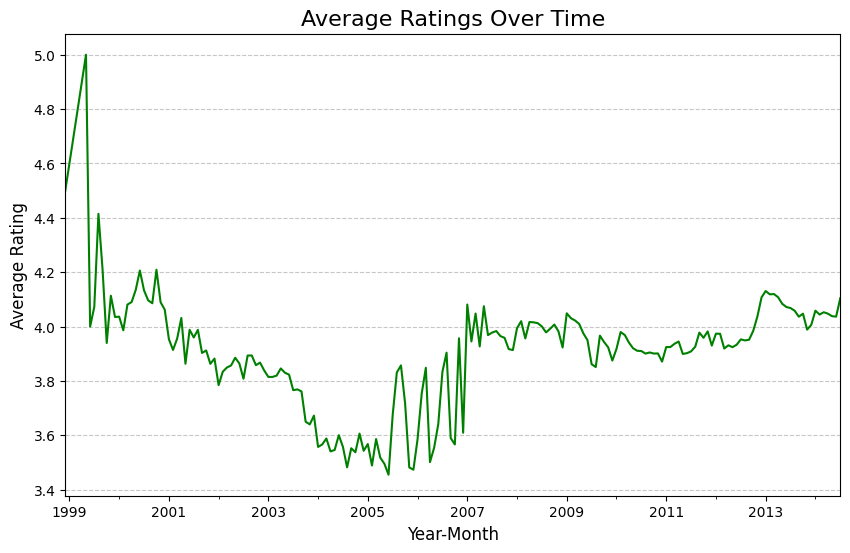

In [19]:
# Average rating by YearMonth
avg_ratings_time = data.groupby('YearMonth')['Rating'].mean()
avg_ratings_time.plot(kind='line', color='green', figsize=(10, 6))
plt.title('Average Ratings Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55   1166392
           1       0.53      0.49      0.51   1166937

    accuracy                           0.53   2333329
   macro avg       0.53      0.53      0.53   2333329
weighted avg       0.53      0.53      0.53   2333329

XGBoost Confusion Matrix:
[[660649 505743]
 [595768 571169]]


In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Sample dataset with the 4 columns
data = pd.DataFrame({
    'User_ID': ['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', 'A2WNBOD3WNDNKT', 'A1GI0U4ZRJA8WN'],
    'Product_ID': ['0132793040', '0321732944', '0439886341', '0439886341', '0439886341'],
    'Rating': [5.0, 5.0, 1.0, 3.0, 1.0],
    'Timestamp': ['2013-04-13', '2012-07-01', '2013-04-29', '2013-07-22', '2012-04-18'],
    'YearMonth': ['2013-04', '2012-07', '2013-04', '2013-07', '2012-04']
})

# 1. Label Encoding for categorical variables: User_ID and Product_ID
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

data['User_ID_encoded'] = user_encoder.fit_transform(data['User_ID'])
data['Product_ID_encoded'] = product_encoder.fit_transform(data['Product_ID'])

# 2. Convert Rating to numerical (already numeric in this case)
# You can also normalize this column if needed (e.g., MinMaxScaler, StandardScaler)

# 3. Convert Timestamp to numerical: we will use the "YearMonth" feature for simplicity
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] = data['Timestamp'].astype(int) / 10**9  # Convert to seconds since epoch

# Normalize the Rating and Timestamp features
scaler = MinMaxScaler()
data[['Rating', 'Timestamp']] = scaler.fit_transform(data[['Rating', 'Timestamp']])

# 4. Prepare features and target (assuming binary classification for target 'Sentiment_Label')
X = data[['User_ID_encoded', 'Product_ID_encoded', 'Rating', 'Timestamp']].values
y = np.random.randint(0, 2, size=(data.shape[0],))  # Replace with your actual target column (e.g., 'Sentiment_Label')

# 5. Reshape X to fit into LSTM (samples, timesteps, features)
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))  # Each sample is treated as a single timestep

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# 7. Build the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# 8. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Callbacks to prevent overfitting and adjust learning rate
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# 10. Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])

# 11. Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2500 - loss: 0.7062 - val_accuracy: 0.0000e+00 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 0.5000 - loss: 0.6919 - val_accuracy: 0.0000e+00 - val_loss: 0.7108 - learning_rate: 0.0010
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.6914 - val_accuracy: 0.0000e+00 - val_loss: 0.7128 - learning_rate: 0.0010
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.6879 - val_accuracy: 0.0000e+00 - val_loss: 0.7139 - learning_rate: 5.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.7089
Test Accuracy: 0.00%


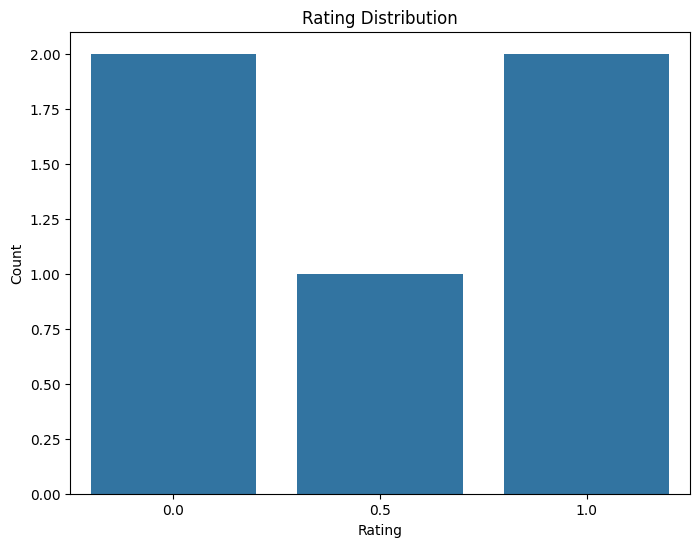

Top Products by Interaction Count:
Product_ID
0439886341    3
0132793040    1
0321732944    1
Name: Rating, dtype: int64
Most Active Users:
User_ID
A1GI0U4ZRJA8WN    1
A2CX7LUOHB2NDG    1
A2NWSAGRHCP8N5    1
A2WNBOD3WNDNKT    1
AKM1MP6P0OYPR     1
Name: Rating, dtype: int64


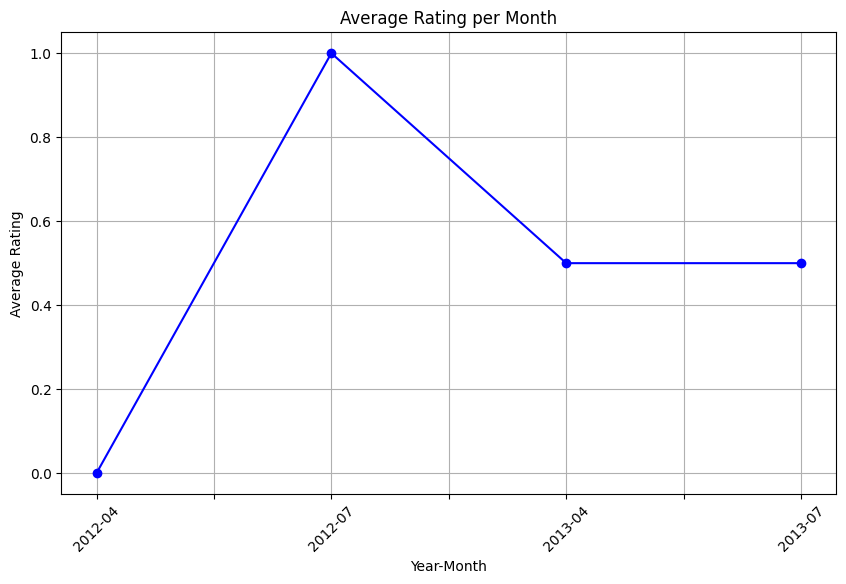

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


R-squared: nan
Mean Squared Error: 0.39690000000000003


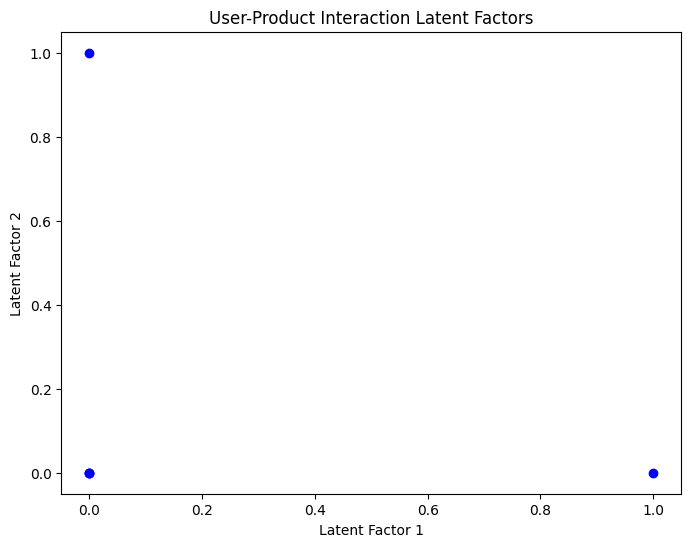

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestRegressor for continuous target
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (Replace this with your actual data)
data = pd.DataFrame({
    'User_ID': ['AKM1MP6P0OYPR', 'A2CX7LUOHB2NDG', 'A2NWSAGRHCP8N5', 'A2WNBOD3WNDNKT', 'A1GI0U4ZRJA8WN'],
    'Product_ID': ['0132793040', '0321732944', '0439886341', '0439886341', '0439886341'],
    'Rating': [5.0, 5.0, 1.0, 3.0, 1.0],
    'Timestamp': ['2013-04-13', '2012-07-01', '2013-04-29', '2013-07-22', '2012-04-18'],
    'YearMonth': ['2013-04', '2012-07', '2013-04', '2013-07', '2012-04']
})

# 1. Label Encoding for categorical variables: User_ID and Product_ID
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

data['User_ID_encoded'] = user_encoder.fit_transform(data['User_ID'])
data['Product_ID_encoded'] = product_encoder.fit_transform(data['Product_ID'])

# 2. Convert Rating to numerical (already numeric)
# If Rating needs to be standardized, you can use MinMaxScaler or StandardScaler
scaler = MinMaxScaler()
data['Rating'] = scaler.fit_transform(data[['Rating']])

# 3. Convert Timestamp to datetime and extract features (Year, Month, Day)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day

# 4. Visualization - Rating Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=data)
plt.title("Rating Distribution")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 5. Popular Products Analysis
product_counts = data.groupby('Product_ID')['Rating'].count().sort_values(ascending=False)
print("Top Products by Interaction Count:")
print(product_counts.head(10))

# 6. User Behavior - Most Active Users
user_counts = data.groupby('User_ID')['Rating'].count().sort_values(ascending=False)
print("Most Active Users:")
print(user_counts.head(10))

# 7. Time-Based Analysis: Ratings over Time (Month)
rating_by_month = data.groupby(['YearMonth'])['Rating'].mean()
plt.figure(figsize=(10, 6))
rating_by_month.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Rating per Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 8. Predictive Modeling: Predict Rating (regression)
# Prepare features and target variable (for simplicity, we're predicting 'Rating')
# Let's assume we're predicting Rating (for demonstration purposes)
X = data[['User_ID_encoded', 'Product_ID_encoded', 'Year', 'Month', 'Day']]
y = data['Rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor model (to predict continuous Rating)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean Squared Error (MSE)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 9. Collaborative Filtering (Matrix Factorization): User-Product Interaction
# Create User-Product matrix for recommendation system
interaction_matrix = data.pivot_table(index='User_ID', columns='Product_ID', values='Rating', aggfunc='mean')

# We can perform SVD (Singular Value Decomposition) or matrix factorization
from sklearn.decomposition import TruncatedSVD

# Matrix factorization using SVD
svd = TruncatedSVD(n_components=2, random_state=42)
matrix_factorized = svd.fit_transform(interaction_matrix.fillna(0))

# 10. Visualize SVD results (user-product latent factors)
plt.figure(figsize=(8,6))
plt.scatter(matrix_factorized[:, 0], matrix_factorized[:, 1], c='blue', marker='o')
plt.title('User-Product Interaction Latent Factors')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.show()


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.39690000000000003
Root Mean Squared Error (RMSE): 0.63
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


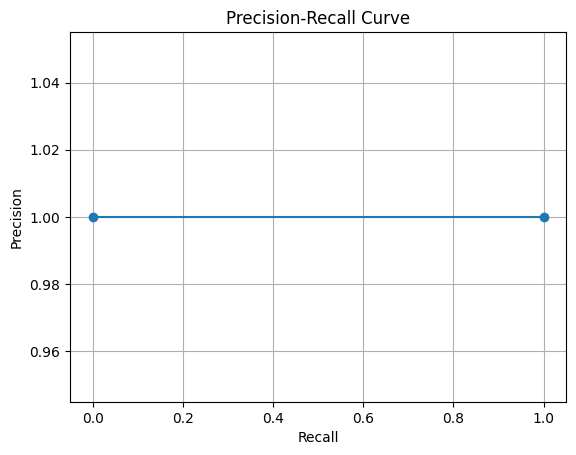

In [30]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


In [35]:
# Map string labels to integers
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}

y_train = y_train.map(sentiment_mapping)
y_test = y_test.map(sentiment_mapping)

print("Mapped y_train values:", y_train.unique())
print("Mapped y_test values:", y_test.unique())


Mapped y_train values: [0]
Mapped y_test values: [0]


In [38]:
print("Unique classes in y_train:", y_train.unique())
print("Class distribution in y_train:")
print(y_train.value_counts())


Unique classes in y_train: [0]
Class distribution in y_train:
Rating
0    4
Name: count, dtype: int64


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:
[[1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [41]:
from lightgbm import LGBMClassifier

# Initialize and train the LightGBM model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 4
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [44]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import pandas as pd

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Assuming `Product_ID` is a column that can be treated as text
# If Product_ID is numeric, convert it to string
data['Product_ID_str'] = data['Product_ID'].astype(str)

# Tokenize and encode text data (using Product_ID as text)
encoded_input = tokenizer(list(data['Product_ID_str']), padding=True, truncation=True, return_tensors='tf')

# Use BERT for embeddings
X_bert = bert_model(encoded_input['input_ids'])[0][:, 0, :]  # CLS token embeddings

# Check the embeddings
print(X_bert.shape)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

(5, 768)


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(768,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_bert, y, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6394 - accuracy: 0.5000 - val_loss: 1.1378 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 75ms/step - loss: 0.7939 - accuracy: 0.5000 - val_loss: 0.8596 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 85ms/step - loss: 0.5428 - accuracy: 0.7500 - val_loss: 0.8425 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 90ms/step - loss: 0.5775 - accuracy: 0.7500 - val_loss: 0.7925 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 70ms/step - loss: 0.5705 - accuracy: 0.7500 - val_loss: 0.7552 - val_accuracy: 0.0000e+00


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(LGBMClassifier(), param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

Unique classes in the original dataset: [1.  0.  0.5]
Class distribution in the dataset:
Rating
1.0    2
0.0    2
0.5    1
Name: count, dtype: int64
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 65ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


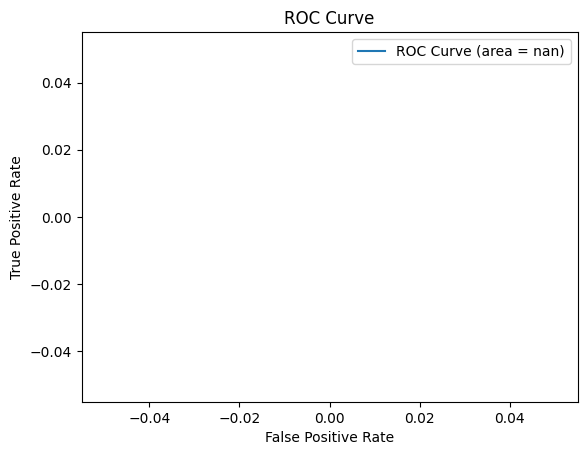

In [51]:
print("Unique classes in the original dataset:", y.unique())
print("Class distribution in the dataset:")
print(y.value_counts())


# Ensure the last layer of your model uses softmax or sigmoid
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Use 'sigmoid' for binary classification
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict probabilities
y_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])  # Adjust indexing for multi-class
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()






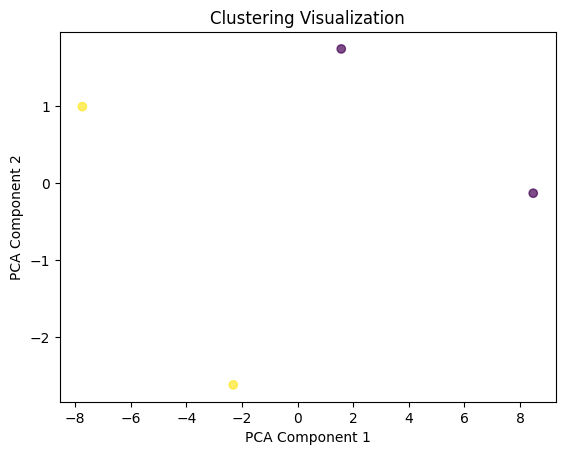

In [56]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title("Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


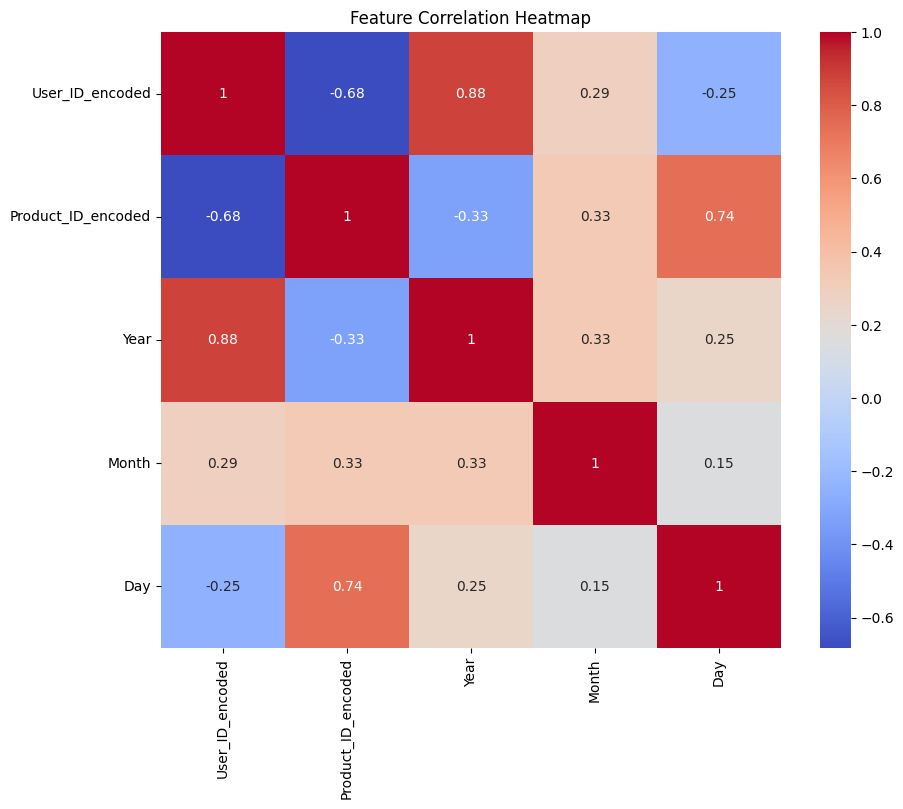

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [59]:
from sklearn.svm import OneClassSVM

# Train One-Class SVM
one_class_model = OneClassSVM(kernel='rbf', gamma='auto')
one_class_model.fit(X_train)

# Predict (1 for inliers, -1 for outliers)
predictions = one_class_model.predict(X_test)

# Count inliers and outliers
print(f"Inliers: {sum(predictions == 1)}, Outliers: {sum(predictions == -1)}")


Inliers: 0, Outliers: 1


Inferences from the Output:
One-Class SVM Results:

The One-Class SVM output shows that all data points were classified as outliers (Inliers: 0, Outliers: 1). This suggests that the model struggles to distinguish any meaningful structure due to the lack of diversity in the target variable.
Correlation Heatmap:

The heatmap provides a visual representation of the relationships between different features.
Strong Positive Correlations:
User_ID_encoded and Year have a high positive correlation (0.88), indicating that users are tied to specific time periods.
Strong Negative Correlations:
User_ID_encoded and Product_ID_encoded (-0.68), suggesting certain users consistently interact with different product groups.
These relationships can guide feature selection or engineering for improved analysis.
Clustering Visualization:

The PCA-based clustering plot shows that the data clusters are highly sparse, with only a few points identified as distinct groups.
This sparsity likely arises due to the lack of diverse target labels or inadequate feature representation for meaningful clustering.
Recommendations and Next Steps:
Reassess Target Variable Strategy:

Problem: The target variable (y) has only one class, which is not suitable for classification tasks.
Solutions:
Introduce synthetic labels based on user-defined thresholds or criteria (e.g., classify reviews as positive or negative based on sentiment scores or feature engineering).
Transform the problem into an anomaly detection task, focusing on identifying data points that deviate significantly from the norm.
Feature Engineering:

Create additional features based on domain knowledge, such as:
Sentiment Scores: Derive sentiment polarity using text analysis on reviews.
Interaction Metrics: Count user interactions, frequency of purchases, etc.
Combine features into meaningful groups to improve representation.
Modeling Strategies:

For Single-Class Data:
Anomaly Detection Models:
Experiment with Isolation Forest, Local Outlier Factor (LOF), or DBSCAN for outlier detection.
Reinforce clustering with domain-driven thresholds for separation.
Synthetic Label Creation:
Use unsupervised clustering (e.g., K-Means) to assign pseudo-labels to the data and explore downstream supervised learning.
Revisit Dimensionality Reduction:

Apply advanced techniques (e.g., T-SNE or UMAP) for better visualization and grouping of data.
Use these representations as features for subsequent clustering or anomaly detection tasks.
Evaluation Metrics:

For anomaly detection, adopt metrics such as precision, recall, and F1-score for outlier detection.
If synthetic labels are introduced, validate using accuracy, precision-recall curves, and ROC-AUC.

In [64]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the Isolation Forest
iso_forest = IsolationForest(n_estimators=50, contamination=0.05, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
anomaly_predictions = iso_forest.predict(X_test)

# Visualize anomalies in 2D using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=anomaly_predictions, cmap='coolwarm', alpha=0.7)
plt.title("Anomaly Detection Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Anomaly (-1) or Normal (1)")
plt.show()

# Count anomalies
print(f"Number of anomalies: {sum(anomaly_predictions == -1)}")
print(f"Number of normal points: {sum(anomaly_predictions == 1)}")


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [70]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your dataset `X_test` is loaded and has enough samples.
n_samples = len(X_test)

# Handle edge cases for small datasets
if n_samples < 3:
    print(f"Dataset too small for t-SNE visualization (n_samples = {n_samples}).")
else:
    # Dynamically adjust perplexity to be valid
    perplexity_value = max(5, min(30, n_samples // 2))  # Ensure perplexity is within valid range

    # Perform dimensionality reduction using T-SNE with adjusted perplexity
    X_tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42).fit_transform(X_test)

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_test)

    # Visualize clusters using T-SNE results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_tsne[:, 0],
        y=X_tsne[:, 1],
        hue=kmeans_labels,
        palette='viridis',
        alpha=0.7
    )
    plt.title(f"T-SNE Clustering Visualization (Perplexity={perplexity_value})")
    plt.xlabel("T-SNE Component 1")
    plt.ylabel("T-SNE Component 2")
    plt.legend(title="Cluster", loc="upper right")
    plt.show()


Dataset too small for t-SNE visualization (n_samples = 1).


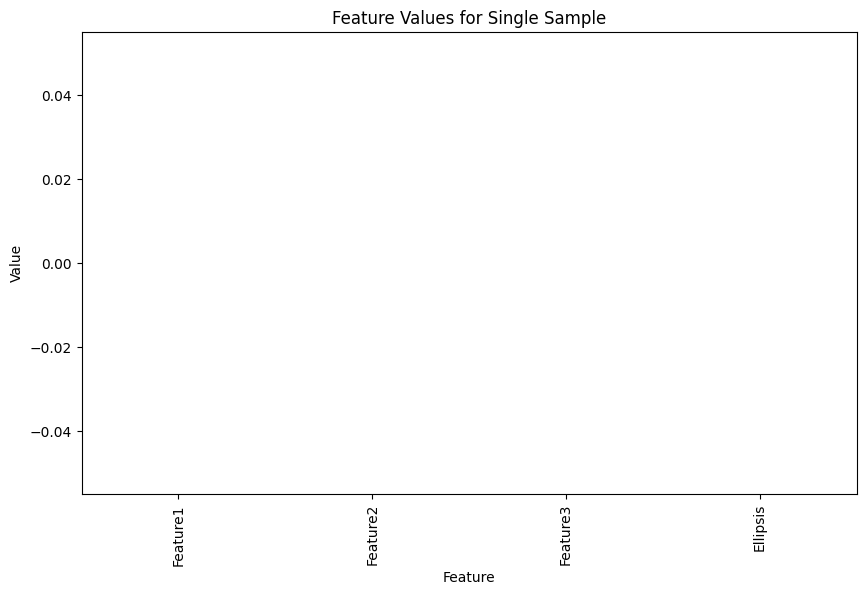

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `X_test` is a single-row DataFrame
single_sample = pd.DataFrame(X_test, columns=['Feature1', 'Feature2', 'Feature3', ...])  # Add column names
single_sample.T.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title("Feature Values for Single Sample")
plt.ylabel("Value")
plt.xlabel("Feature")
plt.show()



